In [ ]:
import pandas as pd
import seaborn as sns
sns.set_palette('husl')
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive

drive.mount("/content/drive")

diabetes_df = pd.read_csv("/content/drive/MyDrive/KTH studies/Colab Notebooks/Scalable ML/project/diabetes_prediction_dataset.csv")
diabetes_df

Mounted at /content/drive


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [ ]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96146 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   gender               96146 non-null  object 
 1   age                  96146 non-null  float64
 2   hypertension         96146 non-null  int64  
 3   heart_disease        96146 non-null  int64  
 4   smoking_history      96146 non-null  object 
 5   bmi                  96146 non-null  float64
 6   HbA1c_level          96146 non-null  float64
 7   blood_glucose_level  96146 non-null  int64  
 8   diabetes             96146 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 7.3+ MB


In [ ]:
diabetes_df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [ ]:
diabetes_df.duplicated().sum()

0

In [ ]:
diabetes_df.drop_duplicates(inplace = True)

In [ ]:
diabetes_df['gender'].value_counts()

Female    56161
Male      39967
Other        18
Name: gender, dtype: int64

In [ ]:
diabetes_df['smoking_history'].value_counts()

never          34398
No Info        32887
former          9299
current         9197
not current     6367
ever            3998
Name: smoking_history, dtype: int64

In [ ]:
diabetes_df.isnull().any()

gender                 False
age                    False
hypertension           False
heart_disease          False
smoking_history        False
bmi                    False
HbA1c_level            False
blood_glucose_level    False
diabetes               False
dtype: bool

In [ ]:
cat_features = diabetes_df.columns[diabetes_df.dtypes == 'object']
num_features = diabetes_df.columns[(diabetes_df.dtypes == 'int64') | (diabetes_df.dtypes == 'float64')]

In [ ]:
cat_features

Index(['gender', 'smoking_history'], dtype='object')

In [ ]:
num_features

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [ ]:
num_features.drop('diabetes')

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
encoder = OrdinalEncoder()

for column in cat_features:
    diabetes_df[[column]] = encoder.fit_transform(diabetes_df[[column]])

diabetes_df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0.0,80.0,0,1,4.0,25.19,6.6,140,0
1,0.0,54.0,0,0,0.0,27.32,6.6,80,0
2,1.0,28.0,0,0,4.0,27.32,5.7,158,0
3,0.0,36.0,0,0,1.0,23.45,5.0,155,0
4,1.0,76.0,1,1,1.0,20.14,4.8,155,0


In [ ]:
corr_matrix = diabetes_df.corr()
corr_matrix["diabetes"].sort_values(ascending=False)

diabetes               1.000000
blood_glucose_level    0.424336
HbA1c_level            0.406408
age                    0.264927
bmi                    0.214932
hypertension           0.195710
heart_disease          0.170711
smoking_history        0.088471
gender                 0.037613
Name: diabetes, dtype: float64

# Exploratory Data Analysis (EDA) our Diabetes Data

Let's look at our diabetes - the distribution and range of values for the 4 different features

*   blood_glucose_level
*   HbA1c_level
*   age
*   bmi        
and the target variable is `diabetes`.

In [ ]:
diabetes_df = diabetes_df.drop(['hypertension', 'heart_disease', 'smoking_history', 'gender'], axis=1)

In [ ]:
diabetes_df

,age,bmi,HbA1c_level,blood_glucose_level,diabetes
0,80.0,25.19,6.6,140,0
1,54.0,27.32,6.6,80,0
2,28.0,27.32,5.7,158,0
3,36.0,23.45,5.0,155,0
4,76.0,20.14,4.8,155,0
...,...,...,...,...,...
99994,36.0,24.60,4.8,145,0
99996,2.0,17.37,6.5,100,0
99997,66.0,27.83,5.7,155,0
99998,24.0,35.42,4.0,100,0


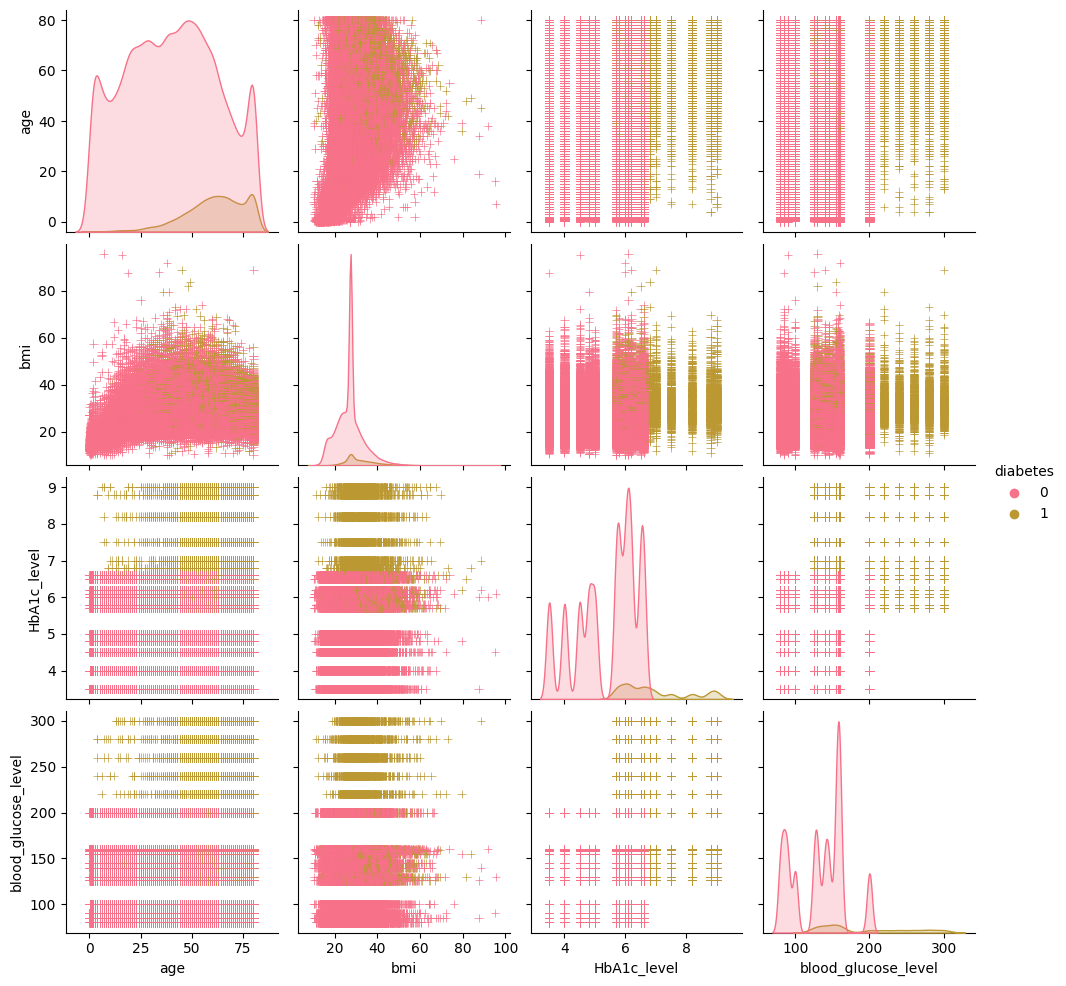

In [ ]:
g = sns.pairplot(diabetes_df, hue='diabetes', markers='+')
plt.show()

# Visualize range of values

We want to design a simulator generate the 3 types of iris flower (setosa, versicolor, virginica). To do this, we can visualize the range of values for the length and width of the sepal and petal for each of the 3 flowers.

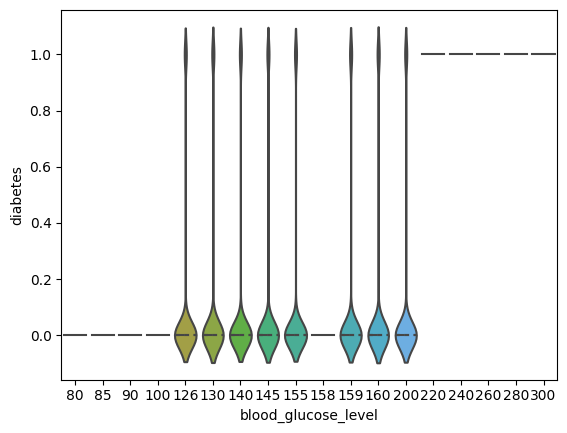

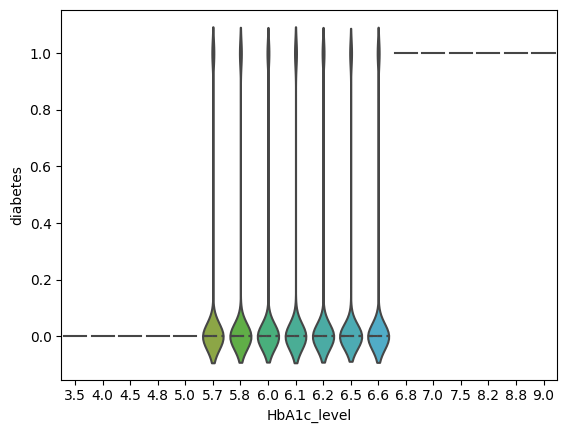

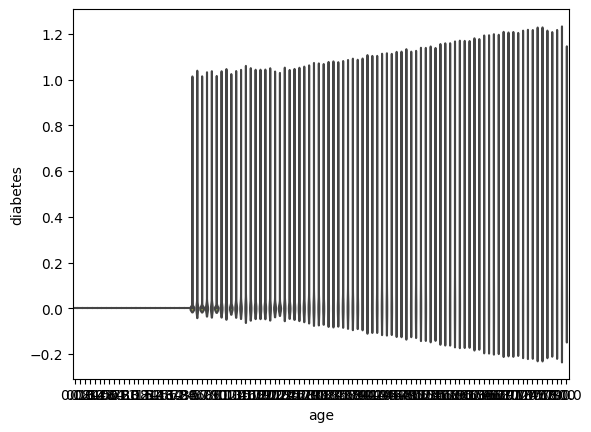

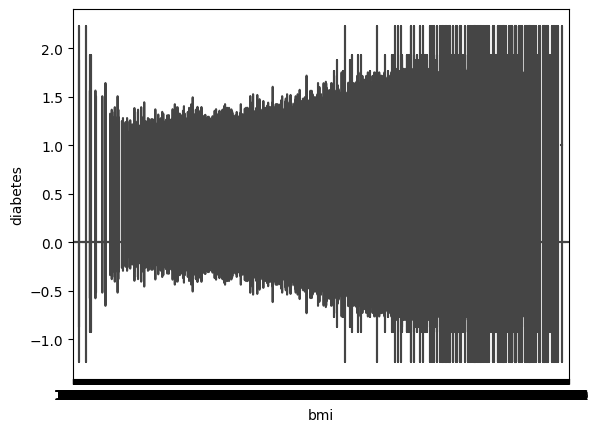

In [ ]:
g = sns.violinplot(y='diabetes', x='blood_glucose_level', data=diabetes_df, inner='quartile')
plt.show()
g = sns.violinplot(y='diabetes', x='HbA1c_level', data=diabetes_df, inner='quartile')
plt.show()
g = sns.violinplot(y='diabetes', x='age', data=diabetes_df, inner='quartile')
plt.show()
g = sns.violinplot(y='diabetes', x='bmi', data=diabetes_df, inner='quartile')
plt.show()

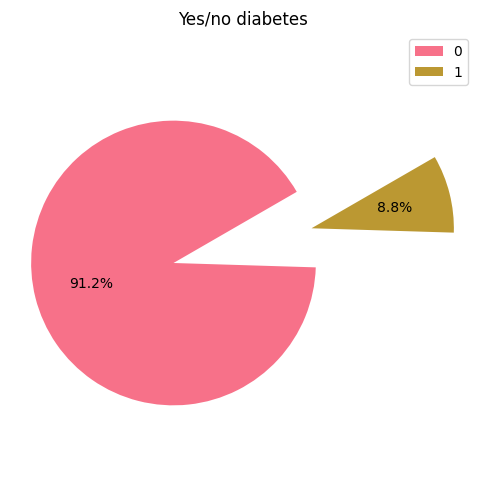

In [ ]:
def balanced_plot(data):

    plt.figure(figsize=(6, 6))
    plt.pie(data.diabetes.value_counts(),
            data.diabetes.value_counts().index,
            autopct='%1.1f%%',
            startangle=30)
    plt.axis('equal')
    plt.legend(data.diabetes.value_counts().index, loc='best')
    plt.title('Yes/no diabetes')
    plt.show()

balanced_plot(diabetes_df)

# Insert our Diabetes DataFrame into a FeatureGroup

Let's write our historical iris feature values and labels to a feature group. When you write historical data, this process is called `backfilling`.

In [ ]:
!pip install -U hopsworks --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.1/46.1 kB 1.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 170.3/170.3 kB 11.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.3/139.3 kB 15.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.4/83.4 kB 10.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 55.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 4.8 MB/s eta 0:00:00
  Preparing meta

In [ ]:
import hopsworks

project = hopsworks.login()
fs = project.get_feature_store()

Copy your Api Key (first register/login): https://c.app.hopsworks.ai/account/api/generated

Paste it here: ··········
Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://c.app.hopsworks.ai:443/p/189588
Connected. Call `.close()` to terminate connection gracefully.


In [ ]:
diabetes_fg = fs.get_or_create_feature_group(
    name="diabetes",
    version=1,
    primary_key=["blood_glucose_level","HbA1c_level","age","bmi"],
    description="Diabetes dataset")
diabetes_fg.insert(diabetes_df)

Feature Group created successfully, explore it at 
https://c.app.hopsworks.ai:443/p/189588/fs/189507/fg/312703


Uploading Dataframe: 0.00% |          | Rows 0/96146 | Elapsed Time: 00:00 | Remaining Time: ?

Launching job: diabetes_1_offline_fg_materialization
Job started successfully, you can follow the progress at 
https://c.app.hopsworks.ai/p/189588/jobs/named/diabetes_1_offline_fg_materialization/executions


(<hsfs.core.job.Job at 0x7817c78816c0>, None)